<a href="https://colab.research.google.com/github/talkin24/GradientBoosting/blob/main/Ch02_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

%cd /content/drive/MyDrive/GradientBoosting

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import warnings

In [3]:
warnings.filterwarnings('ignore')

In [41]:
df_census = pd.read_csv('./census_cleaned.csv')

In [12]:
df_census.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
X = df_census.iloc[:, :-1]
y = df_census.iloc[:, -1]

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [16]:
clf = DecisionTreeClassifier(random_state=2)

In [17]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2)

In [18]:
y_pred = clf.predict(X_test)

In [19]:
accuracy_score(y_test, y_pred)

0.8131679154894976

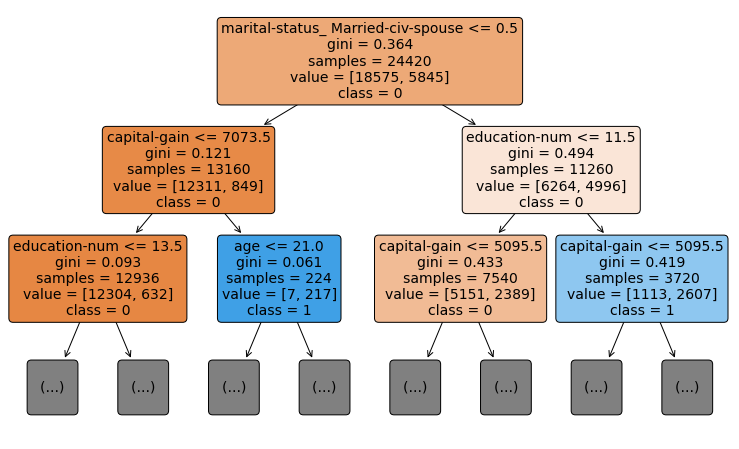

In [22]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(13, 8))
plot_tree(clf, max_depth=2, feature_names=list(X.columns), class_names=['0', '1'],
          filled=True, rounded=True, fontsize=14)
plt.show()

In [27]:
1 - ((1/2)**2) - ((1/2) **2)

0.5

In [42]:
df_bikes = pd.read_csv('bike_rentals_cleaned.csv')

In [43]:
X_bikes = df_bikes.iloc[:, :-1]
y_bikes = df_bikes.iloc[:, -1]

In [44]:
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X_bikes, y_bikes, random_state=2)

In [45]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [46]:
reg = DecisionTreeRegressor(random_state=2)
scores = cross_val_score(reg, X_bikes, y_bikes, scoring='neg_mean_squared_error', cv=5)

In [47]:
rmse = np.sqrt(-scores)
print("RMSE 평균: %0.2f" %(rmse.mean()))

RMSE 평균: 1233.36


In [50]:
reg = DecisionTreeRegressor()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_train)
from sklearn.metrics import mean_squared_error
reg_mse = mean_squared_error(y_train, y_pred)
reg_rmse = np.sqrt(reg_mse)
reg_rmse

0.0

In [51]:
leaf_node_count = 0
tree = reg.tree_
for i in range(tree.node_count):
  if (tree.children_left[i] == -1) and (tree.children_right[i] == -1):
    leaf_node_count += 1
    if tree.n_node_samples[i] > 1:
      print('Node index: ', i, ', # of samples:', tree.n_node_samples[i])
print('whole leaf node numbers: ', leaf_node_count)

Node index:  124 , # of samples: 2
whole leaf node numbers:  547
